In [1]:
import pandas
from sklearn import linear_model
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Load the dataset
df = pandas.read_csv("Laptop_price.csv")

# Create a new DataFrame so we do not change the original, then clean the DataFrame by removing duplicates and dropping the brands table
new_df = df.dropna()
new_df.drop_duplicates(inplace = True)
new_df.drop(['Brand'], axis=1, inplace=True)

# Print the new DataFrame
print(new_df.head(),"\n")
print(new_df.info(),"\n")
print(new_df.to_string(),"\n")

# Calculate the corelations between columns
new_df.corr()

   Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
0         3.830296        16               512    11.185147  2.641094   
1         2.912833         4              1000    11.311372  3.260012   
2         3.241627         4               256    11.853023  2.029061   
3         3.806248        16               512    12.280360  4.573865   
4         3.268097        32              1000    14.990877  4.193472   

          Price  
0  17395.093065  
1  31607.605919  
2   9291.023542  
3  17436.728334  
4  32917.990718   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Processor_Speed   1000 non-null   float64
 1   RAM_Size          1000 non-null   int64  
 2   Storage_Capacity  1000 non-null   int64  
 3   Screen_Size       1000 non-null   float64
 4   Weight            1000 non-null   float64
 5   Price       

Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  \
Processor_Speed          1.000000  0.021391         -0.067576    -0.013425   
RAM_Size                 0.021391  1.000000          0.002111    -0.036002   
Storage_Capacity        -0.067576  0.002111          1.000000    -0.027560   
Screen_Size             -0.013425 -0.036002         -0.027560     1.000000   
Weight                  -0.054603 -0.025382          0.041335     0.021995   
Price                   -0.050737  0.061237          0.997908    -0.026740   

                    Weight     Price  
Processor_Speed  -0.054603 -0.050737  
RAM_Size         -0.025382  0.061237  
Storage_Capacity  0.041335  0.997908  
Screen_Size       0.021995 -0.026740  
Weight            1.000000  0.038417  
Price             0.038417  1.000000

In [2]:
# Manipulate the dataset of the DataFrame to convert the Russian Ruble currency to Canadian Dollars
new_df['Price'] *= (1.0 / 70.07)

# Round all floating point decimals to two decimal places
new_df['Processor_Speed'] = new_df['Processor_Speed'].apply(lambda x: round(x, 2))
new_df['Screen_Size'] = new_df['Screen_Size'].apply(lambda x: round(x, 2))
new_df['Weight'] = new_df['Weight'].apply(lambda x: round(x, 2))
new_df['Price'] = new_df['Price'].apply(lambda x: round(x,2))

# Print the new DataFrame and describe the statistical analysis against the columns of the DataFrame
print(new_df.to_string(),"\n")
new_df.describe()

     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size  Weight   Price
0               3.83        16               512        11.19    2.64  248.25
1               2.91         4              1000        11.31    3.26  451.09
2               3.24         4               256        11.85    2.03  132.60
3               3.81        16               512        12.28    4.57  248.85
4               3.27        32              1000        14.99    4.19  469.79
5               1.88        16               256        11.94    4.84  136.20
6               2.94        32               256        11.71    4.34  148.28
7               3.02         4               256        15.59    2.94  131.50
8               2.56         4               512        15.03    2.74  233.65
9               3.34        32               512        13.61    4.09  264.05
10              3.84         4              1000        14.30    3.09  456.22
11              3.81        32               512        12.87   

Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750630    15.500000        584.576000    14.056760   
std           0.731897    10.988665        313.438517     1.706034   
min           1.510000     4.000000        256.000000    11.010000   
25%           2.090000     8.000000        256.000000    12.637500   
50%           2.765000    16.000000        512.000000    14.100000   
75%           3.362500    32.000000       1000.000000    15.525000   
max           4.000000    32.000000       1000.000000    16.990000   

           Weight        Price  
count  1000.00000  1000.000000  
mean      3.46680   279.780100  
std       0.86661   134.237988  
min       2.00000   122.310000  
25%       2.71750   144.340000  
50%       3.46500   246.715000  
75%       4.21000   450.495000  
max       4.99000   478.150000

In [3]:
# Make a list of the independent input values and call the variable X
X = new_df[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight']].values
# Put the dependent values in the variable y
y = new_df[['Price']].values

# Split the data into training and testing sets for our model to later evaluate our model's performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Set k-folds for Cross Validation which will help us evaluate our model and how it performs on each k-fold
k_folds = KFold(n_splits=10)

# Create a linear regression object
regressor = linear_model.LinearRegression()

# Generate the Cross Validation Score of our regression object and our training sets for each k-fold
scores = cross_val_score(regressor, X_train, y_train, cv = k_folds)

# Input the independent and dependent values as parameters to fill the regression object with our data
regressor.fit(X_train, y_train)

LinearRegression()

In [5]:
# Make predictions using the model
y_pred = regressor.predict(X_test)

# Evaluate the model by calcuating the mean squared error and R-squared
mse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 2.555141389832281
R-squared: 0.999646959360101


In [6]:
# Print out the scores of our Cross Validation through each K-Fold
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Cross Validation Scores:  [0.99943923 0.99945067 0.99922796 0.99952207 0.999538   0.99956409
 0.99963441 0.99963185 0.99948315 0.99965982]
Average CV Score:  0.9995151252549983
Number of CV Scores used in Average:  10


C:\Users\navar\AppData\Local\Temp\ipykernel_26240\1526034823.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


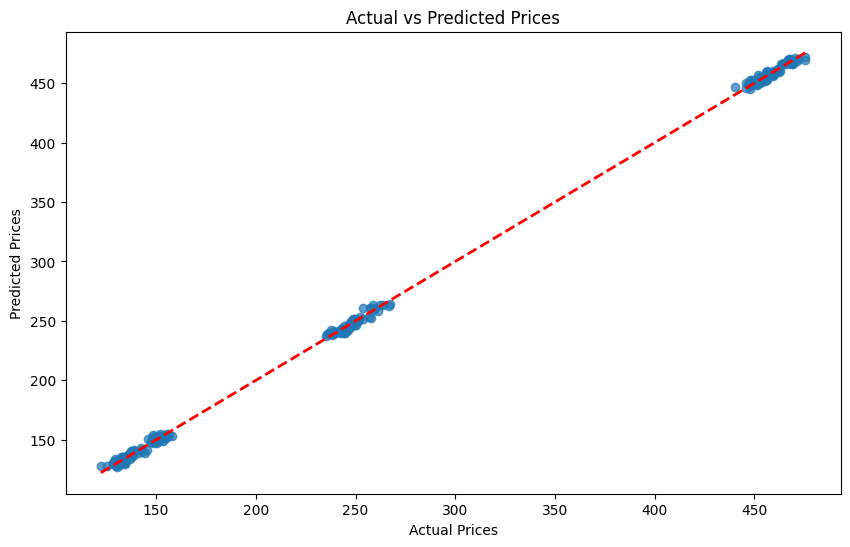

In [7]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
